# Introduction
Getting a quick overview over the complexity of your system.

# Idea
I'm currently really into the bubble chart kind of thing. So let's create a quick overview about our system.


First, we need some sourc code we want to analyze. 

Be sure to format the code to the same style before you repeat this analysis. Otherwise, the results can be irritating.

In [91]:
import glob
import pandas as pd
import os

DIR = "../../dropover"
#DIR = "../../intellij-community/"
TEXT = " "
MULTIPLIER = 4

filelist = pd.DataFrame(glob.glob(DIR + "/**/*.java", recursive=True), columns=["abspath"])
filelist['path'] = filelist['abspath'].str.replace("../../dropover", "").str.replace("\\", "/")
filelist['abspath'] = filelist['abspath'].apply(os.path.abspath)
filelist.head()

,abspath,path
0,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/package-inf...
1,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/pac...
2,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...
3,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...
4,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...


In [92]:
indentations = 0
lines = 0
pattern=TEXT * MULTIPLIER

li = 0

def count_measures(abspath):
    
    indentations = 0
    lines = 0

    try:

        with open(abspath, encoding='utf-8') as f:
            for line in f.readlines():
                indentations = indentations + line.count(pattern)
                lines = lines + 1
                
    except UnicodeDecodeError as e:
        print(abspath, e)
    except PermissionError as e:
        print(abspath, e)
        
    return pd.Series([indentations, lines])
   
filelist[['indentations', 'lines']]= filelist['abspath'].apply(count_measures)
filelist.head()

,abspath,path,indentations,lines
0,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/package-inf...,0,31
1,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/pac...,0,1
2,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,13
3,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,2,10
4,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,18


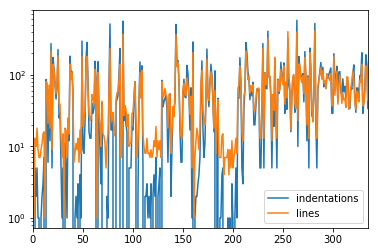

In [93]:
%matplotlib inline
filelist[['indentations', 'lines']].plot(logy=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024433FE7128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000244312B5630>]], dtype=object)

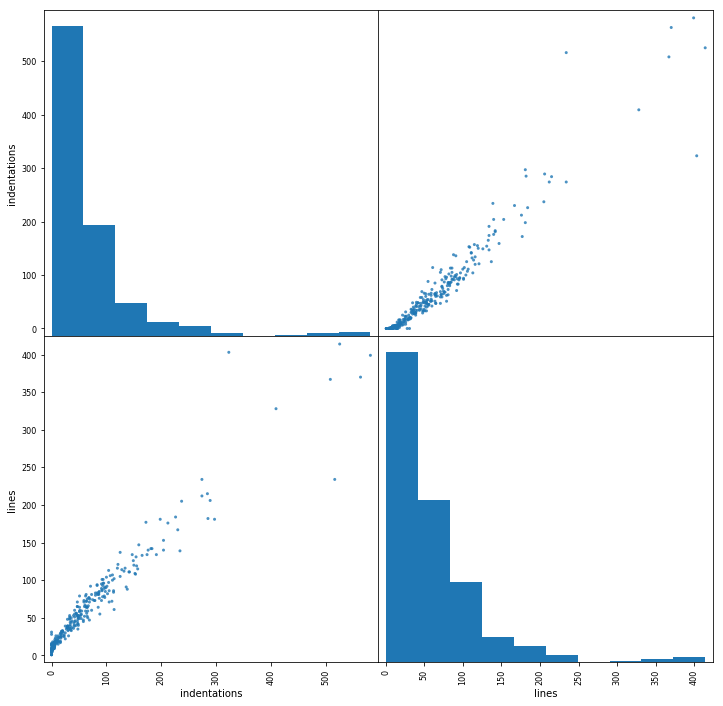

In [94]:
from pandas.plotting import scatter_matrix
scatter_matrix(filelist, alpha=0.8, figsize=(12, 12))

In [95]:
filelist['prop'] = filelist['indentations'] / filelist['lines']
filelist.sort_values(by='prop', ascending=False).head()

,abspath,path,indentations,lines,prop
77,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/framework/c...,516,234,2.205128
182,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/site/intera...,114,61,1.868852
87,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/framework/d...,234,139,1.683453
49,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/files/deliv...,297,181,1.640884
310,c:\dev\repos\dropover\mediumTests\src\test\jav...,/mediumTests/src/test/java/at/dropover/framewo...,88,55,1.600000


In [96]:
filelist['rel_prop'] = filelist['prop'] / filelist['prop'].max()
filelist.head()

,abspath,path,indentations,lines,prop,rel_prop
0,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/package-inf...,0,31,0.000000,0.000000
1,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/pac...,0,1,0.000000,0.000000
2,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,13,0.384615,0.174419
3,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,2,10,0.200000,0.090698
4,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,18,0.277778,0.125969


In [97]:
from matplotlib import cm
from matplotlib.colors import rgb2hex

plot_data = filelist.copy()
plot_data['color'] = [rgb2hex(x) for x in cm.coolwarm(filelist['rel_prop'])]
plot_data.head()

,abspath,path,indentations,lines,prop,rel_prop,color
0,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/package-inf...,0,31,0.000000,0.000000,#3b4cc0
1,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/pac...,0,1,0.000000,0.000000,#3b4cc0
2,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,13,0.384615,0.174419,#7295f4
3,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,2,10,0.200000,0.090698,#5673e0
4,c:\dev\repos\dropover\backend\src\main\java\at...,/backend/src/main/java/at/dropover/comment/bou...,5,18,0.277778,0.125969,#6282ea


In [176]:
import os
import json

    
json_data = {}
json_data['name'] = 'flare'
json_data['children'] = []

for row in plot_data.iterrows():
    series = row[1]
    path, filename = os.path.split(series['path'])

    last_children = None
    children = json_data['children']

    for path_part in path.split("/"):
        entry = None

        for child in children:
            if "name" in child and child["name"] == path_part:
                entry = child
        if not entry:
            entry = {}
            children.append(entry)

        entry['name'] = path_part
        if not 'children' in entry: 
            entry['children'] = []

        children = entry['children']
        last_children = children

    last_children.append({
        'name' : filename + "[l: {}, i: {}, p: {}".format(
            series['lines'],
            series['indentations'],
            series['rel_prop']),
        'size' :  series['lines'],
        'color' : series['color']})

with open ( "vis/flare.json", mode='w', encoding='utf-8') as json_file:
    json_file.write(json.dumps(json_data, indent=3))

In [177]:
radial_data = plot_data[['path', 'lines']]
radial_data['path'] = radial_data['path'].str.replace("/", ".").str[1:]

#radial_data['path'] = radial_data[radial_data['path'].str.endswith("Test.java")]
radial_data['path'] = "dropover." + radial_data['path']
radial_data.head()

C:\dev\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\dev\apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,path,lines
0,dropover.backend.src.main.java.at.dropover.pac...,31
1,dropover.backend.src.main.java.at.dropover.com...,1
2,dropover.backend.src.main.java.at.dropover.com...,13
3,dropover.backend.src.main.java.at.dropover.com...,10
4,dropover.backend.src.main.java.at.dropover.com...,18


In [178]:
radial_data = radial_data.loc[radial_data['path'].str.startswith("dropover.backend")]
radial_data = radial_data.loc[radial_data['path'].str.endswith(".java")]
radial_data = radial_data.loc[~radial_data['path'].str.contains("src.test")]
radial_data.head()

,path,lines
0,dropover.backend.src.main.java.at.dropover.pac...,31
1,dropover.backend.src.main.java.at.dropover.com...,1
2,dropover.backend.src.main.java.at.dropover.com...,13
3,dropover.backend.src.main.java.at.dropover.com...,10
4,dropover.backend.src.main.java.at.dropover.com...,18


In [179]:
data = []
for row in radial_data.iterrows():
    series = row[1]
    
    current_path = series['path']
    current_lines = series['lines']
    path_parts = current_path.replace(".java", "").split(".")
    current_part = ""
    
    for i, part in enumerate(path_parts):
        current_part = current_part + "." + part
        if i < len(path_parts)-1:
            data.append(pd.Series((current_part[1:], "")))
        else:
            data.append(pd.Series((current_part[1:] + "", str(current_lines))))
    
data = pd.DataFrame(data).drop_duplicates()
data.to_csv("vis/flare.csv", index=None, header=['id', 'value'])
data

,0,1
0,dropover,
1,dropover.backend,
2,dropover.backend.src,
3,dropover.backend.src.main,
4,dropover.backend.src.main.at,
5,dropover.backend.src.main.at.dropover,
6,dropover.backend.src.main.at.dropover.package-...,31
13,dropover.backend.src.main.at.dropover.comment,
14,dropover.backend.src.main.at.dropover.comment....,1
22,dropover.backend.src.main.at.dropover.comment....,
